# 📦 E-commerce Revenue Leakage Analysis

## 1. Introduction

This project analyzes transaction data from a UK-based online retailer to identify potential revenue leakage points. The dataset contains all purchases made between 2010 and 2011, including canceled orders, product codes, and customer IDs.

### 🧭 Objective
- Detect and quantify revenue losses due to returns, cancellations, and irregular pricing.
- Provide actionable insights to reduce leakage and improve profit margins.

## 2. Importing Libraries

We start by importing essential libraries for data analysis and visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## 3. Loading the Dataset

Now we load the dataset (data.csv) from [Kaggle](https://chatgpt.com/c/684f47ea-32e8-800c-b59a-0249493aad89) and preview the first few rows.


In [2]:
#Loading the dataset
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

#first 10 rows
print("First 10 rows:")
df.head(10)

First 10 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
#checking the shape of dataset before data cleaning
print("Current shape of dataset:", df.shape)

Current shape of dataset: (541909, 8)


### 4. Data Cleaning

In this step the dataset will be cleaned to ensure accurate analysis and visualizations. Said cleaning steps include:

- **Check for null values** to identify missing or incomplete data.
  
- **Handle missing `CustomerID` values**, which are required for customer-level analysis.

- **Remove canceled transactions**, identified by `InvoiceNo` starting with `'C'`.

- **Convert `InvoiceDate` to datetime format** for time-based operations.

- **Drop duplicate rows** to avoid double-counting or skewed insights.

- **Drop "Manual" rows** as they are not tied to real products


In [4]:
#checking for null values
print("NULL VALLUES-\n")
print(df.isnull().sum())

NULL VALLUES-

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
#handling missing CustomerID values
df = df[~df['CustomerID'].isnull()]
print("Missing CustomerID rows removed.")

Missing CustomerID rows removed.


In [6]:
#removing canceled transactions(InvoiceNo starting with 'C')
canceled_orders=df[df["InvoiceNo"].astype(str).str.startswith("C")]
df=df[~df["InvoiceNo"].astype(str).str.startswith("C")]
print("Canceled transactions removed")

Canceled transactions removed


In [7]:
# convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("InvoiceDate converted to datetime.\n")
print(df["InvoiceDate"])

InvoiceDate converted to datetime.

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397924, dtype: datetime64[ns]


In [8]:
# drop duplicate rows
df = df.drop_duplicates()
print("Duplicate rows dropped.\n")

#checking shape of dataset after cleaning
print("Current shape of dataset:", df.shape)

Duplicate rows dropped.

Current shape of dataset: (392732, 8)


In [9]:
df=df[df["Description"]!="Manual"]

## 5. Exploratory Data Analysis (EDA)

In this section, we explore the cleaned dataset to uncover patterns, trends, and insights that can help identify potential areas of revenue leakage. The key areas of analysis include:

- **Descriptive Statistics:** Summary statistics to understand central tendencies and data distribution.
  
- **Revenue by Country:** Comparison of total revenue generated by each country.

- **Top Selling Products:** Identify products with the highest total sales.

- **Number of Unique Customers:** Understanding the customer base size and diversity.

- **Monthly Revenue Trend:** Analyzing how revenue changes over time to detect seasonal patterns or drops.

Each of the following subsections dives into these points with both code and interpretation.


In [10]:
# Descriptive statistics for all columns (including categorical)
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,392447,392447,392447,392447.000000,392447,392447.000000,392447.000000,392447
unique,18471,3664,3876,NaN,NaN,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,542,2023,2016,NaN,NaN,NaN,NaN,348981
mean,NaN,NaN,NaN,13.145589,2011-07-10 19:28:21.777514496,3.001032,15287.664036,NaN
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:16:00,1.250000,13955.000000,NaN
50%,NaN,NaN,NaN,6.000000,2011-07-31 12:05:00,1.950000,15150.000000,NaN
75%,NaN,NaN,NaN,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,NaN


In [11]:
#finding out the total revenue by Country
df["Cost"]=df["UnitPrice"]*df["Quantity"]
revenue_by_country=df.groupby("Country")["Cost"].sum().sort_values(ascending=False)
print("REVENUE BY COUNTRY:\n")
print(revenue_by_country)

REVENUE BY COUNTRY:

Country
United Kingdom          7265185.704
Netherlands              285446.340
EIRE                     261888.120
Germany                  226382.150
France                   199441.940
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38337.830
Japan                     37416.370
Norway                    35325.140
Portugal                  29151.900
Finland                   21994.880
Channel Islands           20147.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13182.160
Austria                   10198.680
Singapore                  9120.390
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590

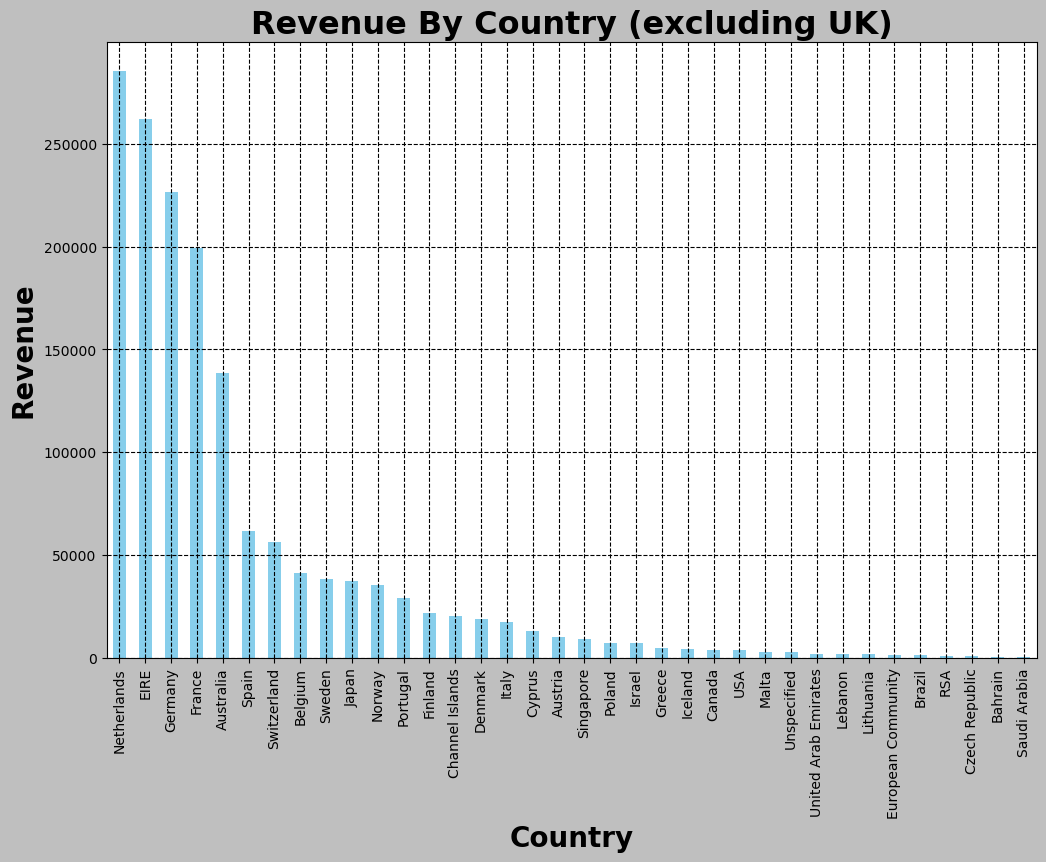

In [12]:
#creating a bar chart of revenue by country excluding the United Kingdom as it dominates.
excluding_uk=revenue_by_country.drop("United Kingdom")
plt.style.use("grayscale")
plt.figure(figsize=(12,8))
excluding_uk.plot(kind='bar',color="skyblue")
plt.xlabel("Country",fontsize=20,fontweight="heavy")
plt.ylabel("Revenue",fontsize=20,fontweight="heavy")
plt.title("Revenue By Country (excluding UK)",fontsize=23,fontweight="heavy")
plt.grid(True,linestyle='--')
plt.show()

In [13]:
#finding out the highest selling products by quantity of products and revenue
highest_selling_quantity=df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print("10 HIGHEST SELLING PRODUCTS BY QUANTITY:\n")
print(highest_selling_quantity)
highest_selling_revenue=df.groupby("Description")["Cost"].sum().sort_values(ascending=False).head(10)
print("\n-----------------------------------------------\n")
print("\n10 HIGHEST SELLING PRODUCTS BY REVENUE:\n")
print(highest_selling_revenue)

10 HIGHEST SELLING PRODUCTS BY QUANTITY:

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

-----------------------------------------------


10 HIGHEST SELLING PRODUCTS BY REVENUE:

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT        

In [14]:
#finding out the number of unique customers
unique_customers = df['CustomerID'].nunique()
print("Number of unique customers:", unique_customers)

#number of unique customers per country
customers_per_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print("\nNumber of unique customers per country")
print(customers_per_country)

Number of unique customers: 4336

Number of unique customers per country
Country
United Kingdom          3918
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Greece                     4
EIRE                       3
Israel                     3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Czech Republic             1
Lithuania                  1
Lebanon                    1
RSA                 

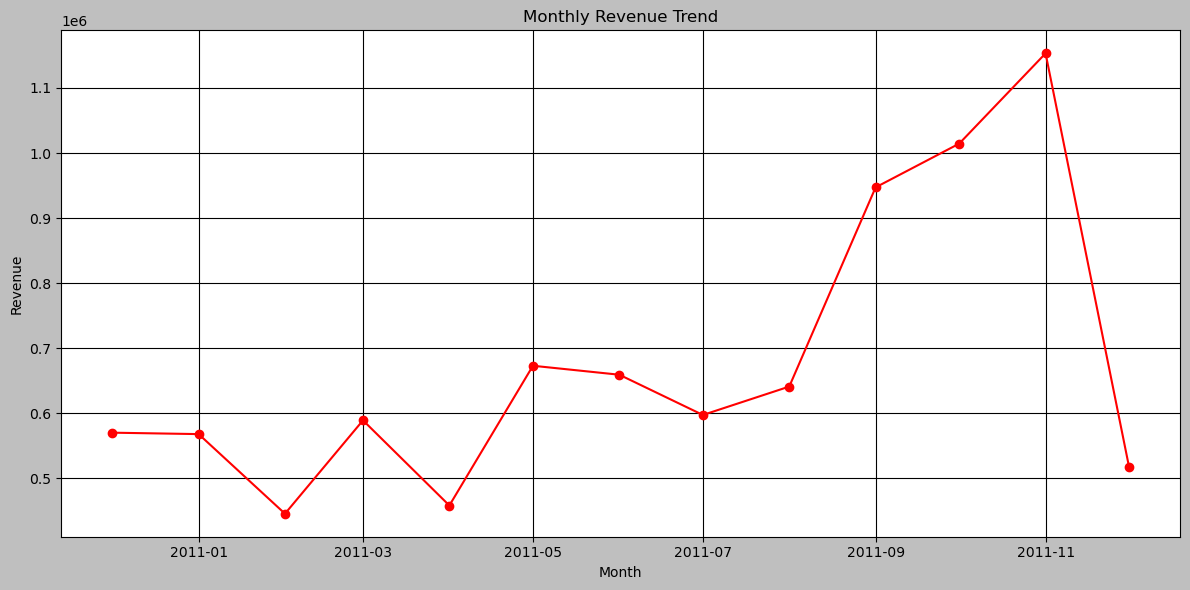

In [15]:
# extracting month-year from InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# finding monthly revenue per month
monthly_revenue = df.groupby('InvoiceMonth')['Cost'].sum().reset_index()

# converting InvoiceMonth back to datetime for plotting
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['InvoiceMonth'], monthly_revenue['Cost'], marker='o',color="red")
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


### 6. Identifying Revenue Leakages

- **Canceled orders**  
  Orders where the `InvoiceNo` starts with **'C'** are considered canceled. These are direct revenue losses and should be filtered and analyzed separately. 

- **Negative quantities**  
  Rows with negative `Quantity` values typically indicate **returns**. A high volume of such rows may suggest product dissatisfaction, errors, or even fraud.

- **Orders with zero/negative price**  
  Any rows where `UnitPrice` is **zero or negative** result in no revenue or even a loss. These may be due to system errors, incorrect inputs, or untracked discounts.


In [16]:
#finding out the revenue lost through cancellation of orders.
canceled_orders["Revenue Lost"]=canceled_orders["UnitPrice"]*(-(canceled_orders["Quantity"]))
revenue_lost_through_cancelation=int(canceled_orders["Revenue Lost"].sum())
print(f"Total Revenue Lost Through Cancellation Of Orders: ${revenue_lost_through_cancelation:,}")
revenue_through_sales=int(df["Cost"].sum())
print(f"Revenue Made Through Sales: ${revenue_through_sales:,}")

#finding out the total revenue if these revenue losses are converted to revenue generated and the actual revenue 
ideal_revenue=int(canceled_orders["Revenue Lost"].sum() + df["Cost"].sum())
actual_revenue=int(df["Cost"].sum() - canceled_orders["Revenue Lost"].sum())
print(f"Ideal Revenue: ${int(ideal_revenue):,}")
print(f"Actual Revenue: ${int(actual_revenue):,}")


Total Revenue Lost Through Cancellation Of Orders: $611,342
Revenue Made Through Sales: $8,833,788
Ideal Revenue: $9,445,131
Actual Revenue: $8,222,446


In [17]:
quantity_of_orders_cancelled=-canceled_orders["Quantity"].sum()
quantity_of_orders_delivered=df["Quantity"].sum()
print(f"{quantity_of_orders_delivered:,} items were delivered, whereas {quantity_of_orders_cancelled:,} items were cancelled")

deliveredVScancelled=[quantity_of_orders_delivered,quantity_of_orders_cancelled]

5,158,947 items were delivered, whereas 274,808 items were cancelled


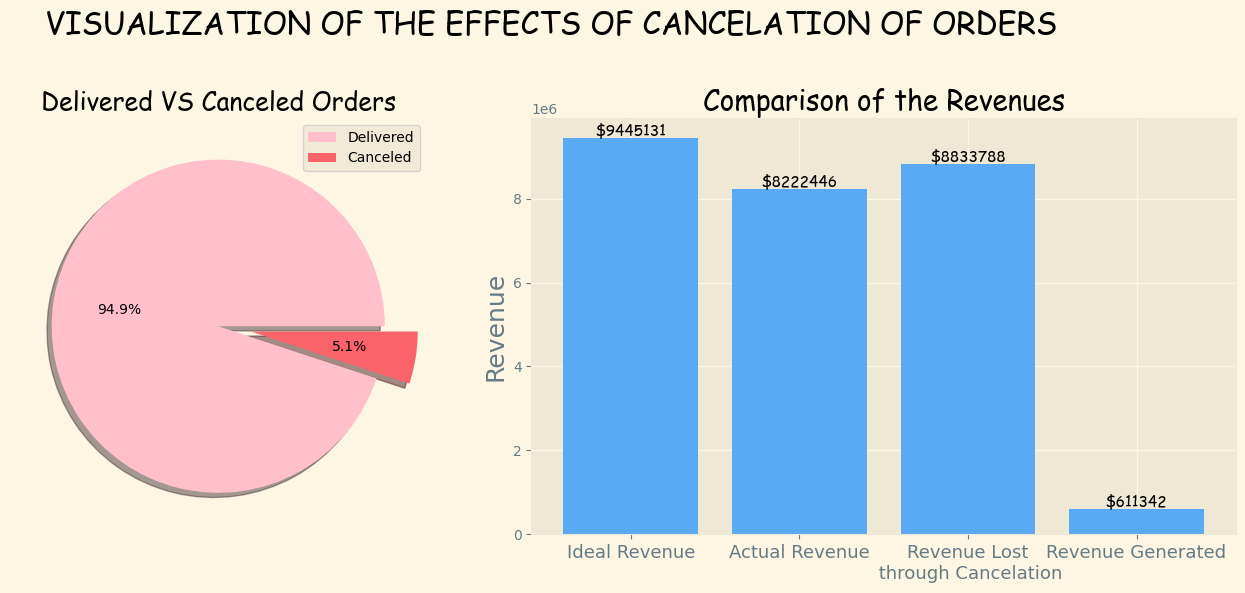

In [19]:
#visualization of the effects of cancelation
revenues=[ideal_revenue,actual_revenue,revenue_through_sales,revenue_lost_through_cancelation]
explode=[0,0.2]
labels=["Delivered","Canceled"]
plt.style.use('Solarize_Light2')
plt.figure(figsize=(14,6))

#pie plot to show the percentage of Delivered VS Canceled Orders
plt.subplot(1,2,1)
plt.pie(deliveredVScancelled,colors=("pink","#fb636b"),shadow=True,explode=explode,autopct='%1.1f%%')
plt.title("Delivered VS Canceled Orders",fontname="Comic Sans MS",fontsize=18)
plt.legend(labels,loc="upper right")
plt.tight_layout()

#comparing all the different revenues on a bar chart
plt.subplot(1,2,2)
types=["Ideal Revenue","Actual Revenue","Revenue Lost\n through Cancelation","Revenue Generated"]
plt.bar(types,revenues,color="#57aaf3")
for i in range(len(types)):
    plt.text(i,revenues[i]+45000,"$"+str(revenues[i]),ha="center",fontsize=11,fontname="Comic Sans MS")
plt.title("Comparison of the Revenues",fontname="Comic Sans MS",fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.ylabel("Revenue",fontsize=18)
plt.xticks(fontsize=13)

plt.tight_layout()
plt.suptitle("VISUALIZATION OF THE EFFECTS OF CANCELATION OF ORDERS",fontsize=22,fontname="Comic Sans MS",ha="center")
plt.subplots_adjust(top=0.8)
plt.show()

### The sublplots show the effects of cancelation of orders and compare the different revenues

In [ ]:
#checking for orders where quantity<0 indicating errors or returns
print(df[df["Quantity"]<0])
print("It is observed that no revenue was lost through returns")

In [ ]:
#checking for rows where unit price is less than or equal to zero
up0_products=df[df["UnitPrice"]<=0].copy()
up0_products

In [ ]:
#replacing the 0 unit prices with actual unit prices to calculate the loss caused due to them.
valid_prices=df[df["UnitPrice"]>0]
up_map=(valid_prices.groupby("Description")["UnitPrice"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]).to_dict())
up0_products["UnitPrice"] = up0_products["Description"].map(up_map)

#calculating the revenue lost 
up0_products["Revenue Lost"]=up0_products["UnitPrice"]*up0_products["Quantity"]
revenue_lost_up0=int(up0_products["Revenue Lost"].sum())
print(f"The total revenue lost due to system errors/untracked discounts: ${revenue_lost_up0:,}")

quantity_of_errors=up0_products["Quantity"].sum()

In [ ]:
quantities=[quantity_of_orders_delivered,quantity_of_orders_cancelled,quantity_of_errors]
plt.style.use('grayscale')
plt.figure(figsize=(8,6))
plt.bar(["Quantity of Orders\n Delivered","Quantity of Orders\n Canceled","Quantity of Errors"],quantities,color="skyblue")
plt.title("COMPARISON BETWEEN QUANTITIES OF ORDERS")
plt.tight_layout()
plt.show()

### The bar graph shows how the **quantity of errors** is **minuscule** compared to other quantities ###

In [ ]:
#finding out the percentage of quantities of orders wasted due to cancellation and errors
total_orders=sum(quantities)
percent_cancelled=(quantity_of_orders_cancelled/total_orders)*100
percent_errors=(quantity_of_errors/total_orders)*100
print(f"Percent of orders cancelled due to cancellation are {percent_cancelled:.2f}% whereas due to errors are {percent_errors:.2f}%\n")

#finding out the percentage of revenue lost due to cancellation of orders and errors
per_revenue_cancelled=(revenue_lost_through_cancelation/ideal_revenue)*100
per_revenue_errors=(revenue_lost_up0/ideal_revenue)*100
print(f"Percent of revenue lost due to cancellations are {per_revenue_cancelled:.2f}% whereas due to errors are {per_revenue_errors:.2f}%")


## Final Recommendations

Based on the analysis:


### 1. **Prioritize Reducing Cancellations (Highest Impact Area)**
- **Total Canceled Orders:** 274,808 orders (~5.04% of all orders).
- **Revenue Lost from Cancellations:** £611,342 (≈ 6.47% of potential revenue).
- Many cancellations involve high-value items and repeat customers — indicating preventable churn.

### 2. **Secondary Focus – Data Accuracy**  
   - While incorrect entries (e.g., negative or zero prices) should be fixed to maintain reporting integrity, their contribution to total revenue leakage is relatively small(0.14%) compared to cancellations(6.47%).  
   - Cleaning such records will help avoid misleading metrics, but the overall business gain from fixing them will be minor unless combined with cancellation reduction efforts.

### 3. **Action Steps**  
   - Investigate common reasons for cancellations (logistics delays, stock-outs, payment failures) and address them systematically.  
   - Implement measures like better inventory management, improved delivery timelines, and proactive customer communication.  
   - Maintain a regular data quality audit to prevent and quickly correct product record errors.

**Conclusion:**  
The analysis makes it clear that while data errors exist, reducing the cancellation rate should be the **utmost priority** to maximize revenue recovery. Data cleanup is important, but it will have a far smaller financial impact compared to successfully converting canceled orders into fulfilled ones.
